<a href="https://colab.research.google.com/github/ecenn/C23-PS260/blob/main/heart_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setup**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

#**Data**

###Dataset

In [ ]:
file = '/content/heart_2020_cleaned.csv'
df = pd.read_csv(file, ',')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df = df.reindex(columns=['HeartDisease','Sex','AgeCategory','BMI','Smoking','Diabetic','Stroke', 'AlcoholDrinking','DiffWalking','PhysicalActivity','SleepTime'])

In [ ]:
df['Sex'] = df['Sex'].replace(['Female', 'Male'], [0, 1]).astype(float)
df['AgeCategory'] = df['AgeCategory'].replace(['18-24', '25-29', '30-34', '35-39', '40-44', '25-29',
                                               '30-34', '35-40', '41-44', '45-49', '50-54', '55-59',
                                               '60-64', '65-69', '70-74', '75-79', '80 or older'],
                                                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).astype(float)
df['Smoking'] = df['Smoking'].replace(['No', 'Yes'], [0, 1]).astype(float)
df['Diabetic'] = df['Diabetic'].replace(['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes'], [0, 1, 2, 3]).astype(float)
df['Stroke'] = df['Stroke'].replace(['No', 'Yes'], [0, 1]).astype(float)
df['AlcoholDrinking'] = df['AlcoholDrinking'].replace(['No', 'Yes'], [0, 1]).astype(float)
df['DiffWalking'] = df['DiffWalking'].replace(['No', 'Yes'], [0, 1]).astype(float)
df['PhysicalActivity'] = df['PhysicalActivity'].replace(['No', 'Yes'], [0, 1]).astype(float)
df['HeartDisease'] = df['HeartDisease'].replace(['No', 'Yes'], [0, 1]).astype(float)

In [ ]:
df.head()

,HeartDisease,Sex,AgeCategory,BMI,Smoking,Diabetic,Stroke,AlcoholDrinking,DiffWalking,PhysicalActivity,SleepTime
0,0.0,0.0,11.0,16.60,1.0,3.0,0.0,0.0,0.0,1.0,5.0
1,0.0,0.0,16.0,20.34,0.0,0.0,1.0,0.0,0.0,1.0,7.0
2,0.0,1.0,13.0,26.58,1.0,3.0,0.0,0.0,0.0,1.0,8.0
3,0.0,0.0,15.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,0.0,0.0,4.0,23.71,0.0,0.0,0.0,0.0,1.0,1.0,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119759 entries, 0 to 119758
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      119759 non-null  float64
 1   Sex               119758 non-null  float64
 2   AgeCategory       119758 non-null  float64
 3   BMI               119759 non-null  float64
 4   Smoking           119759 non-null  float64
 5   Diabetic          119758 non-null  float64
 6   Stroke            119759 non-null  float64
 7   AlcoholDrinking   119759 non-null  float64
 8   DiffWalking       119759 non-null  float64
 9   PhysicalActivity  119758 non-null  float64
 10  SleepTime         119758 non-null  float64
dtypes: float64(11)
memory usage: 10.1 MB


In [ ]:
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

<Axes: xlabel='HeartDisease', ylabel='count'>

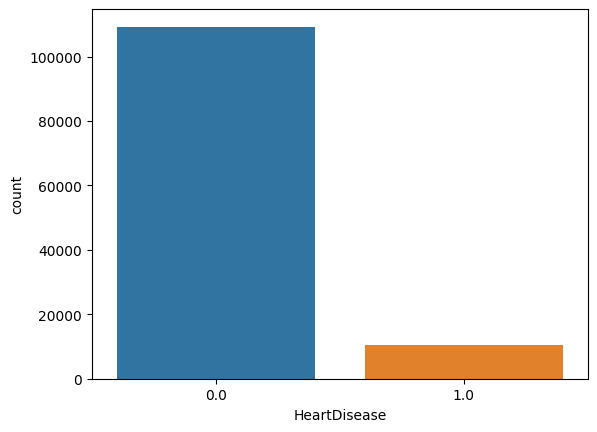

In [ ]:
sns.countplot(data=df, x='HeartDisease')

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

###Logistic Regression

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# Model
model = Sequential()
model.add(Dense(512, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(),bias_regularizer=tf.keras.regularizers.L2())),
tf.keras.layers.Dropout(0.2),
model.add(Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(),bias_regularizer=tf.keras.regularizers.L2())),
model.add(Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(),bias_regularizer=tf.keras.regularizers.L2())),
tf.keras.layers.Dropout(0.1),
model.add(Dense(64, activation="relu")),
tf.keras.layers.Dropout(0.05),
model.add(Dense(1, activation='sigmoid', input_dim=x_train.shape[1]))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
655/655 [==============================] - 9s 10ms/step - loss: 2.9068 - accuracy: 0.9126 - val_loss: nan - val_accuracy: 0.9113
Epoch 2/10
655/655 [==============================] - 6s 10ms/step - loss: 0.9162 - accuracy: 0.9126 - val_loss: nan - val_accuracy: 0.9119
Epoch 3/10
655/655 [==============================] - 7s 11ms/step - loss: 0.5482 - accuracy: 0.9127 - val_loss: nan - val_accuracy: 0.9119
Epoch 4/10
655/655 [==============================] - 6s 9ms/step - loss: 0.4393 - accuracy: 0.9127 - val_loss: nan - val_accuracy: 0.9119
Epoch 5/10
655/655 [==============================] - 8s 13ms/step - loss: 0.3863 - accuracy: 0.9128 - val_loss: nan - val_accuracy: 0.9118
Epoch 6/10
655/655 [==============================] - 6s 10ms/step - loss: 0.3541 - accuracy: 0.9127 - val_loss: nan - val_accuracy: 0.9119
Epoch 7/10
655/655 [==============================] - 8s 13ms/step - loss: 0.3326 - accuracy: 0.9127 - val_loss: nan - val_accuracy: 0.9118
Epoch 8/10
655/655 [=

###Performance Evaluation

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Akurasi model pada data pengujian: {accuracy * 100:.2f}%")

1123/1123 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.9117
Akurasi model pada data pengujian: 91.17%
